# Analyze pitch catalogs



In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.minor.visible'] = True




import pandas as pd

import glob

In [2]:
from src.ellipse import *

In [3]:
# start by selecting your year of interest
year = '2020'

# todo: add cross-year slices

In [4]:
RH19 = pd.read_csv('processed/fourseamers_2019_R.csv')
LH19 = pd.read_csv('processed/fourseamers_2019_L.csv')

RH20 = pd.read_csv('processed/fourseamers_2020_R.csv')
LH20 = pd.read_csv('processed/fourseamers_2020_L.csv')


In [5]:

pltcategories = ['xrelease','zrelease','vx0','vy0','vz0','ax','ay','az','spin','launch_angle','launch_velocity']

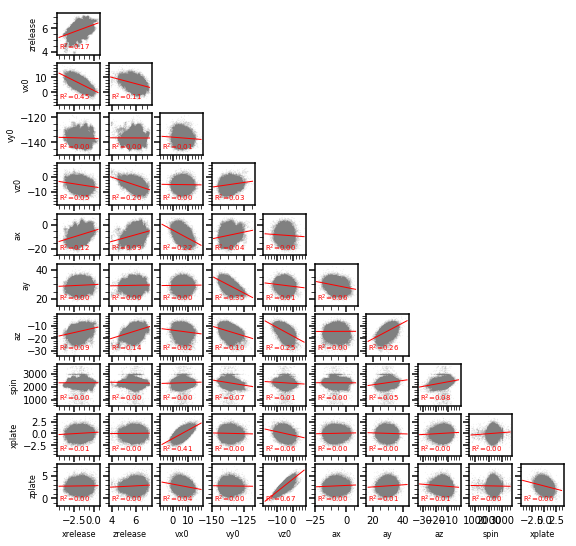

In [6]:
from scipy import stats
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 8


S = RH20
categories = ['xrelease','zrelease','vx0','vy0','vz0','ax','ay','az','spin','xplate','zplate']

fig = plt.figure(figsize=(10,10))


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)

w = np.where((S['zrelease']>3.9) & (S['xrelease']<0.6) & (S['velocity']>80))[0]

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(S[categories[i]][w],S[categories[j]][w],color='grey',s=0.1,alpha=0.1)
        
    #ax.scatter(S[categories[i]][my_number],S[categories[j]][my_number],marker='*',color='red',s=10.)
    #ax.scatter(S[categories[i]][my_number2],S[categories[j]][my_number2],marker='s',color='red',s=10.)



        
    # do the stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(S[categories[i]][w],S[categories[j]][w])
    
    xvals = np.linspace(np.nanmin(S[categories[i]][w]),np.nanmax(S[categories[i]][w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    ax.text(np.nanmin(S[categories[i]][w]),np.nanmin(S[categories[j]][w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    #ax.set_xlabel(categories[i])
    #ax.set_ylabel(categories[j])
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
#fig.tight_layout()

plt.savefig('figures/fastball_correlations.png',dpi=300)

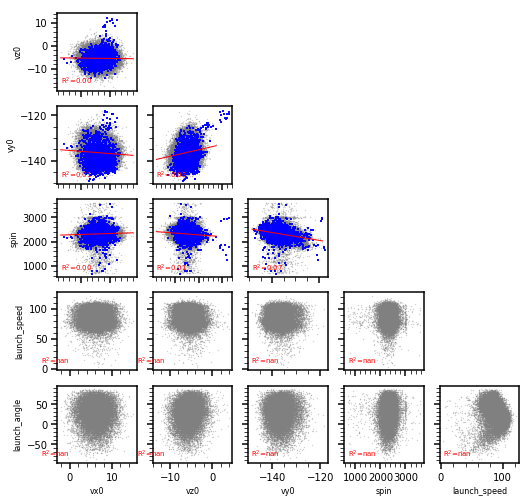

In [7]:
from scipy import stats
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 8


S = RH20
categories = ['vx0','vz0','vy0','spin','launch_speed','launch_angle']

fig = plt.figure(figsize=(10,10))


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


w = np.where((S['zrelease']>3.9) & (S['xrelease']<0.6) & (S['velocity']>80))[0]


#player = b'Michael Petersen'
my_number = [S['outcome']=='home_run'][0]

#player = b'Erich Rentz'
my_number2 = [S['outcome']=='strikeout'][0]

#ncategories -= 1

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(S[categories[i]][w],S[categories[j]][w],color='grey',s=0.1,alpha=0.5)
        
    #ax.scatter(S[categories[i]][my_number],S[categories[j]][my_number],marker='*',color='red',s=1.)
    ax.scatter(S[categories[i]][my_number2],S[categories[j]][my_number2],marker='s',color='blue',s=1.)



        
    # do the stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(S[categories[i]][w],S[categories[j]][w])
    
    xvals = np.linspace(np.nanmin(S[categories[i]][w]),np.nanmax(S[categories[i]][w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    ax.text(np.nanmin(S[categories[i]][w]),np.nanmin(S[categories[j]][w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    #ax.set_xlabel(categories[i])
    #ax.set_ylabel(categories[j])
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
#fig.tight_layout()

plt.savefig('figures/fastball_outcome_correlations2.png',dpi=300)



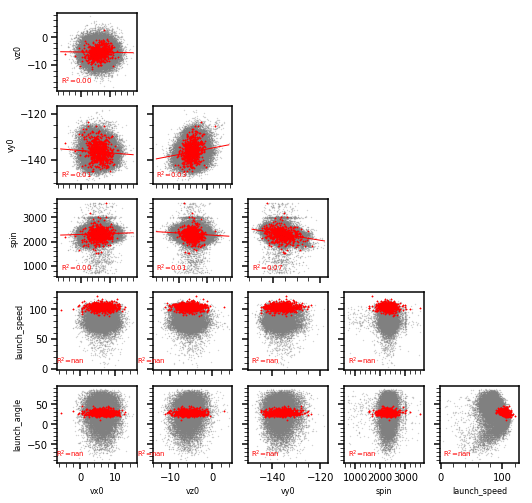

In [9]:
from scipy import stats
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 8


S = RH20
categories = ['vx0','vz0','vy0','spin','launch_speed','launch_angle']

fig = plt.figure(figsize=(10,10))


ncategories = len(categories)

catrange = np.arange(1,(ncategories)*(ncategories)+1)


w = np.where((S['zrelease']>3.9) & (S['xrelease']<0.6) & (S['velocity']>80))[0]


#player = b'Michael Petersen'
my_number = [S['outcome']=='home_run'][0]

#player = b'Erich Rentz'
my_number2 = [S['outcome']=='strikeout'][0]

#ncategories -= 1

for x in catrange:
    i = (x-1)%(ncategories) # this is the column
    j = int((x-1)/(ncategories)) # this is the row
    #print(i,j,x)
    
    pltnum = ((j)*(ncategories-1)) + (i) + 1
    


    
    if i>=j: continue
        
    #print(pltnum,i,j)


    
    ax = fig.add_subplot((ncategories),(ncategories),x)
            
    ax.scatter(S[categories[i]][w],S[categories[j]][w],color='grey',s=0.1,alpha=0.5)
        
    ax.scatter(S[categories[i]][my_number],S[categories[j]][my_number],marker='*',color='red',s=1.)
    #ax.scatter(S[categories[i]][my_number2],S[categories[j]][my_number2],marker='s',color='blue',s=1.)



        
    # do the stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(S[categories[i]][w],S[categories[j]][w])
    
    xvals = np.linspace(np.nanmin(S[categories[i]][w]),np.nanmax(S[categories[i]][w]),100)
    ax.plot(xvals,xvals*slope + intercept,color='red',lw=1.0)
    ax.text(np.nanmin(S[categories[i]][w]),np.nanmin(S[categories[j]][w]),'R$^2$={0:3.2f}'.format(r_value**2),color='red',ha='left',va='bottom',size=7)
    
    #ax.set_xlabel(categories[i])
    #ax.set_ylabel(categories[j])
    
    if j==ncategories-1: 
        ax.set_xlabel(categories[i])
    else:
        ax.set_xticklabels(())
        
    if i==0: 
        ax.set_ylabel(categories[j])
    else:
        ax.set_yticklabels(())
        
        
#fig.tight_layout()

plt.savefig('figures/fastball_outcome_correlations.png',dpi=300)




In [8]:
print(np.unique(RH20['ballpark']))

['ARI' 'ATL' 'BAL' 'BOS' 'CHC' 'CIN' 'CLE' 'COL' 'CWS' 'DET' 'HOU' 'KC'
 'LAA' 'LAD' 'MIA' 'MIL' 'MIN' 'NYM' 'NYY' 'OAK' 'PHI' 'PIT' 'SD' 'SEA'
 'SF' 'STL' 'TB' 'TEX' 'TOR' 'WSH']
